<h1>Q4-1 Implement Decision Tree</h1>

In [613]:
"""
Have Fun!
- 189 Course Staff
"""
from collections import Counter

import numpy as np
from numpy import genfromtxt
import scipy.io
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
#from pydot import graph_from_dot_data
import io
import math
email = ["ham", "spam"]

import random
random.seed(246810)
np.random.seed(246810)

eps = 1e-5  # a small number

def generate_random_integers(n):
    random_integers = [random.randint(0, n) for _ in range(n)]
    return random_integers

def generate_random_numbers(n, k):
    numbers = list(range(n))
    random_numbers = random.sample(numbers, k)
    
    return random_numbers

def select_elements_by_indexes(arr, indexes):
    selected_elements = [arr[i] for i in indexes]
    return selected_elements

def accuracy_score(labels, predictions, length):
    score = 0
    for i in range(length):
        if (labels[i] == predictions[i]):
            score += 1
            #print("test")
    return score / length
    
def array_to_csv (arr, filename):
    with open(filename, 'w') as file:
        file.write("Id,Category\n")
        for i, v in enumerate(arr):
            file.write(f'{i +1}, {v}\n')    
    
    
#Shuffle? Validation?
class DecisionTree:

    def __init__(self, max_depth=3, feature_labels=None, m = 1):
        self.max_depth = max_depth
        self.m = m
        self.labels = None
        self.features = feature_labels
        self.left, self.right = None, None  # for non-leaf nodes
        self.split_idx, self.thresh = None, None  # for non-leaf nodes
        self.data, self.pred = None, None  # for leaf nodes

    @staticmethod
    def entropy(y):
        # TODO

        # Get unique labels and count
        unique_labels = np.unique(y)
        num_unique_labels = len(unique_labels)
        #print("Number of unique labels:", num_unique_labels)
        #print("Unique labels:", unique_labels)

        prob_by_class = []
        for i in range(num_unique_labels):
            count = np.count_nonzero(y == unique_labels[i])
            prob_by_class.append(count / len(y))
        
        entropy = 0      
        for i in range(num_unique_labels):
            entropy += prob_by_class[i] * math.log2(prob_by_class[i])
        
        return -entropy

    @staticmethod
    def information_gain(X, y, idx, thresh):
        # TODO
        #print(np.shape(X))
        #print(np.shape(y))
        #print(idx)
        #print(thresh)
        entropy_before_split = DecisionTree.entropy(y)
        obj = DecisionTree()
        X0, y0, X1, y1 = obj.split(X = X, y = y, idx=idx, thresh=thresh)
        entropy_after_split = (len(y0) * DecisionTree.entropy(y0) + len(y1) * DecisionTree.entropy(y1)) / len(y)
        return entropy_before_split - entropy_after_split
    
    '''
    @staticmethod
    def gini_impurity(X, y, thresh):
        # TODO
        pass

    @staticmethod
    def gini_purification(X, y, thresh):
        # TODO
        pass
    '''

    def split(self, X, y, idx, thresh):
        #print("idx = ", idx)
        #print("thresh = ", thresh)
        X0, idx0, X1, idx1 = self.split_test(X, idx=idx, thresh=thresh)
        idx0_np = np.array(idx0)
        idx1_np = np.array(idx1)
        y0, y1 = y[idx0_np], y[idx1_np]
        return X0, y0, X1, y1

    def split_test(self, X, idx, thresh):
        idx0 = np.where(X[:, idx] < thresh)[0]
        #print("idx0: ", idx0)
        idx1 = np.where(X[:, idx] >= thresh)[0]
        #print("idx1: ", idx1)
        X0, X1 = X[idx0, :], X[idx1, :]
        return X0, idx0, X1, idx1

    def fit(self, X, y):
        # TODO
        self.labels = y
        X_np = np.array(X)
        y_np = np.array(y)
        freq_counter = Counter(y_np)
        max_freq_element = max(freq_counter, key=freq_counter.get)
        #print(len(freq_counter))
        if (len(freq_counter) == 1 or self.max_depth == 0):
            self.max_depth = 0
            self.data = X
            self.pred = max_freq_element
            #print(self.pred)
        else:
            highest_information_gain = 0
            split_index = 0
            threshold = 0
            random_features_index = generate_random_numbers(len(features), self.m)
            #print(len(random_features_index))
            #print(len(features))
            #print("m = ", self.m)
            for num in random_features_index:
                #print(X)
                #print(i)
                column = X_np[:, num]
                unique_features = np.unique(column)
                num_unique_features = len(unique_features)
                for j in range(num_unique_features):
                    #print(i)
                    info_gain = DecisionTree.information_gain(X_np, y_np, idx = num, thresh = unique_features[j])
                    if (info_gain > highest_information_gain):
                        highest_information_gain = info_gain
                        split_index = num
                        threshold = unique_features[j]
                        
            self.split_idx = split_index
            self.thresh = threshold
            #print(split_index)
            #print(threshold)
            X_left, y_left, X_right, y_right = self.split(X = X_np, y = y_np, idx = split_index, thresh = threshold)
            if (len(y_left) == 0 and len(y_right) == 0):
                print("test")
            if (len(y_left) == 0):
                self.right = DecisionTree(max_depth = self.max_depth - 1, feature_labels = features, m = self.m)
                self.right.fit(X_right, y_right)
            elif (len(y_right) == 0):
                self.left = DecisionTree(max_depth = self.max_depth - 1, feature_labels = features, m = self.m)
                self.left.fit(X_left, y_left)
            else:
                self.right = DecisionTree(max_depth = self.max_depth - 1, feature_labels = features, m = self.m)
                self.left = DecisionTree(max_depth = self.max_depth - 1, feature_labels = features, m = self.m)
                self.right.fit(X_right, y_right)
                self.left.fit(X_left, y_left)
            
            
        

    def predict(self, X):
        # TODO
        if (self.split_idx == None or (self.left == None and self.right == None)):
            num = self.pred    
            return num
        elif (X[self.split_idx] >= self.thresh or self.left == None):
            return self.right.predict(X)   
        elif (X[self.split_idx] < self.thresh or self.right == None):
            return self.left.predict(X)
    
    def predict_with_description(self, X, order):
        if (self.split_idx == None or (self.left == None and self.right == None)):
            num = self.pred
            print(f'Therefore the emial is a {email[int(self.pred)]}')    
            return num
        elif (X[self.split_idx] >= self.thresh or self.left == None):
            print(f'({order}) "{self.features[self.split_idx]}" >= {self.thresh}')
            return self.right.predict_with_description(X = X, order = order + 1)   
        elif (X[self.split_idx] < self.thresh or self.right == None):
            print(f'({order}) "{self.features[self.split_idx]}" < {self.thresh}')
            return self.left.predict_with_description(X = X, order = order + 1)
                 
    
    def __repr__(self):
        if self.max_depth == 0:
            return "%s (%s)" % (self.pred, self.labels.size)
        else:
            #print(self.split_idx)
            return "[%s < %s: %s | %s]" % (self.features[self.split_idx],
                                           self.thresh, self.left.__repr__(),
                                           self.right.__repr__())
     
 

def preprocess(data, fill_mode=True, min_freq=10, onehot_cols=[]):
    # fill_mode = False

    # Temporarily assign -1 to missing data
    data[data == b''] = '-1'
    # Hash the columns (used for handling strings)
    onehot_encoding = []
    onehot_features = []
    for col in onehot_cols:
        counter = Counter(data[:, col])
        for term in counter.most_common():
            if term[0] == b'-1':
                continue
            if term[-1] <= min_freq:
                break
            onehot_features.append(term[0])
            onehot_encoding.append((data[:, col] == term[0]).astype(float))
        data[:, col] = '0'
    onehot_encoding = np.array(onehot_encoding).T
    data = np.hstack(
        [np.array(data, dtype=float),
         np.array(onehot_encoding)])

    # Replace missing data with the mode value. We use the mode instead of
    # the mean or median because this makes more sense for categorical
    # features such as gender or cabin type, which are not ordered.
    def calc_mode(values, ignore_value=-1):
        values = np.array(values)
        return scipy.stats.mode(values[values!=ignore_value])[0]
    
    if fill_mode:      
        for i in range (len(data[0])):
            column = data[:, i]
            #print(column)
            #print(stats.mode(column))
            mode_value = calc_mode(column)
            column[column == -1] = mode_value
            data[:, i] = column
    
    
    return data, onehot_features
    

def evaluate(clf):
    print("Cross validation", cross_val_score(clf, X, y))
    if hasattr(clf, "decision_trees"):
        counter = Counter([t.tree_.feature[0] for t in clf.decision_trees])
        first_splits = [
            (features[term[0]], term[1]) for term in counter.most_common()
        ]
        print("First splits", first_splits)


if __name__ == "__main__":
    dataset = "titanic"
    # dataset = "spam"
    params = {
        "max_depth": 5,
        # "random_state": 6,
        "min_samples_leaf": 10,
    }
    N = 100

    if dataset == "titanic":
        # Load titanic data
        path_train = 'datasets/titanic/titanic_training.csv'
        data = genfromtxt(path_train, delimiter=',', dtype=None)
        path_test = 'datasets/titanic/titanic_testing_data.csv'
        test_data = genfromtxt(path_test, delimiter=',', dtype=None)
        y = data[1:, 0]  # label = survived
        class_names = ["Died", "Survived"]

        labeled_idx = np.where(y != b'')[0]
        y = np.array(y[labeled_idx], dtype=float).astype(int)
        print("\n\nPart (b): preprocessing the titanic dataset")
        X, onehot_features = preprocess(data[1:, 1:], onehot_cols=[1, 5, 7, 8])
        X = X[labeled_idx, :]
        print(X[0])
        Z, _ = preprocess(test_data[1:, :], onehot_cols=[1, 5, 7, 8])
        assert X.shape[1] == Z.shape[1]
        features = list(data[0, 1:]) + onehot_features

    elif dataset == "spam":
        features = [
            "pain", "private", "bank", "money", "drug", "spam", "prescription",
            "creative", "height", "featured", "differ", "width", "other",
            "energy", "business", "message", "volumes", "revision", "path",
            "meter", "memo", "planning", "pleased", "record", "out",
            "semicolon", "dollar", "sharp", "exclamation", "parenthesis",
            "square_bracket", "ampersand"
        ]
        assert len(features) == 32

        # Load spam data
        path_train = 'datasets/spam_data/spam_data.mat'
        data = scipy.io.loadmat(path_train)
        X = data['training_data']
        y = np.squeeze(data['training_labels'])
        Z = data['test_data']
        class_names = ["Ham", "Spam"]

    else:
        raise NotImplementedError("Dataset %s not handled" % dataset)

    print("Features", features)
    print("Train/test size", X.shape, Z.shape)
    
    print("\n\nPart 0: constant classifier")
    print("Accuracy", 1 - np.sum(y) / y.size)

    # sklearn decision tree
    print("\n\nsklearn's decision tree")
    clf = DecisionTreeClassifier(random_state=0, **params)
    clf.fit(X, y)
    evaluate(clf)

    '''
    clf_test = DecisionTree(max_depth = 5, feature_labels = features, m = 10)
    clf_test.fit(X, y)
    prediction = []
    for i in range(len(X)):
        predict = clf_test.predict(X[i])
        prediction.append(predict)
    
    print(accuracy_score(y, prediction, len(X)))
    
    #kaggle
    
    kaggle_prediction = []
    for i in range(len(Z)):
        predict = clf_test.predict(Z[i])
        #print(predict)
        kaggle_prediction.append(predict)
        
    
    #print(kaggle_prediction)
    
    #array_to_csv(kaggle_prediction, ".csv")
    
    out = io.StringIO()
    export_graphviz(
        clf, out_file=out, feature_names=features, class_names=class_names)
    # For OSX, may need the following for dot: brew install gprof2dot
    graph = graph_from_dot_data(out.getvalue())
    graph_from_dot_data(out.getvalue())[0].write_pdf("%s-tree.pdf" % dataset)
    '''
    
    # TODO





Part (b): preprocessing the titanic dataset
[ 3.    0.   24.    0.    0.    0.    8.05  0.    0.    1.    0.    1.
  0.    0.  ]
Features [b'pclass', b'sex', b'age', b'sibsp', b'parch', b'ticket', b'fare', b'cabin', b'embarked', b'male', b'female', b'S', b'C', b'Q']
Train/test size (1009, 14) (300, 14)


Part 0: constant classifier
Accuracy 0.6194251734390486


sklearn's decision tree
Cross validation [0.79207921 0.82178218 0.77722772 0.7970297  0.78109453]


/var/folders/5d/y5bz0f7j1gd0v9bjb6l6pfqc0000gn/T/ipykernel_25368/989855996.py:285: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = genfromtxt(path_train, delimiter=',', dtype=None)
/var/folders/5d/y5bz0f7j1gd0v9bjb6l6pfqc0000gn/T/ipykernel_25368/989855996.py:287: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  test_data = genfromtxt(path_test, delimiter=',', dtype=None)


<h1>Q4-2 Implement a Random Forest

In [603]:
class BaggedTrees(BaseEstimator, ClassifierMixin):

    def __init__(self, params=None, n=200, max_depth = 3, feature_labels = None, m = 1):
        if params is None:
            params = {}
        self.params = params
        self.n = n
        self.m = m
        self.decision_trees = [
            DecisionTree(max_depth = max_depth, feature_labels = feature_labels, m = m)
            for i in range(self.n)
        ]

    def fit(self, X, y):
        X_np = np.array(X)
        #print(np.shape(y))
        count = 0
        for tree in self.decision_trees:
            count += 1
            X_bagged = []
            y_bagged = []
            n_prime = len(X) - 1
            random_values = generate_random_integers(n_prime)
            X_bagged = select_elements_by_indexes(X_np, random_values)
            #print(np.shape(X_bagged))
            y_bagged = select_elements_by_indexes(y, random_values)
            #print(np.shape(y_bagged))
            tree.fit(X_bagged, y_bagged)
            '''
            if (count % 20 == 0):
                print("Fished ", count)
            '''
        
        
        
    def predict(self, X):
        prediction = 0
        num = 0
        count = 0
        for tree in self.decision_trees:
            count += 1
            num += (tree.predict(X))
        """
        freq_counter = Counter(prediction)
        max_freq_element = max(freq_counter, key=freq_counter.get)    
        """
        if ( (num / count) > 0.5):
            return 1
        else: 
            return 0
        


class RandomForest(BaggedTrees):

    def __init__(self, params=None, max_depth = 3, feature_labels = None, n=200, m=1):
        if params is None:
            params = {}
        params['max_features'] = m
        self.m = m
        super().__init__(max_depth = max_depth, feature_labels = feature_labels, n = n, m = m)
"""
clf_test = RandomForest(max_depth = 5, feature_labels = features, m = 4, n = 200)
clf_test.fit(X, y)
prediction = []
#print(np.shape(X))
for i in range(len(X)):
    predict = clf_test.predict(X[i])
    prediction.append(predict)

#print(prediction)
print(accuracy_score(y, prediction, len(X)))
"""

'\nclf_test = RandomForest(max_depth = 5, feature_labels = features, m = 4, n = 200)\nclf_test.fit(X, y)\nprediction = []\n#print(np.shape(X))\nfor i in range(len(X)):\n    predict = clf_test.predict(X[i])\n    prediction.append(predict)\n\n#print(prediction)\nprint(accuracy_score(y, prediction, len(X)))\n'

<h1> Q4-4 Performance Evaluation (Titanic)

In [611]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Titanic_decision_tree = DecisionTree(max_depth = 8, feature_labels = features, m = 14)
Titanic_decision_tree.fit(X_train, y_train)

prediction = []
for i in range(len(X_train)):
    predict = Titanic_decision_tree.predict(X_train[i])
    prediction.append(predict)
    
print("Titanic/decision tree/training:")
print(accuracy_score(y_train, prediction, len(y_train)))

prediction = []
for i in range(len(X_test)):
    predict = Titanic_decision_tree.predict(X_test[i])
    prediction.append(predict)
    
print("Titanic/decision tree/validation:")
print(accuracy_score(y_test, prediction, len(y_test)))

Titanic_random_forest = RandomForest(max_depth = 6, feature_labels = features, m = 14, n = 250)
Titanic_random_forest.fit(X_train, y_train)

prediction = []
for i in range(len(X_train)):
    predict = Titanic_random_forest.predict(X_train[i])
    prediction.append(predict)
    
print("Titanic/random forest/training:")
print(accuracy_score(y_train, prediction, len(y_train)))

prediction = []
for i in range(len(X_test)):
    predict = Titanic_random_forest.predict(X_test[i])
    prediction.append(predict)
    
print("Titanic/random forest/validation:")
print(accuracy_score(y_test, prediction, len(y_test)))


(807, 14)
(202, 14)
(807,)
(202,)
Titanic/decision tree/training:
0.8785625774473358
Titanic/decision tree/validation:
0.806930693069307
Titanic/random forest/training:
0.8475836431226765
Titanic/random forest/validation:
0.8564356435643564


<h1> Q4-4 Performance Evaluation (Spam)

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Or my own method?
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Spam_decision_tree = DecisionTree(max_depth = 20, feature_labels = features, m = 32)
Spam_decision_tree.fit(X_train, y_train)

prediction = []
for i in range(len(X_train)):
    predict = Spam_decision_tree.predict(X_train[i])
    prediction.append(predict)
    
print("Spam/decision tree/training:")
print(accuracy_score(y_train, prediction, len(y_train)))

prediction = []
for i in range(len(X_test)):
    predict = Spam_decision_tree.predict(X_test[i])
    prediction.append(predict)
    
print("Spam/decision tree/validation:")
print(accuracy_score(y_test, prediction, len(y_test)))

Spam_random_forest = RandomForest(max_depth = 20, feature_labels = features, m = 7)
Spam_random_forest.fit(X_train, y_train)

prediction = []
for i in range(len(X_train)):
    predict = Spam_random_forest.predict(X_train[i])
    prediction.append(predict)
    
print("Spam/random forest/training:")
print(accuracy_score(y_train, prediction, len(y_train)))

prediction = []
for i in range(len(X_test)):
    predict = Spam_random_forest.predict(X_test[i])
    prediction.append(predict)
    
print("Spam/random forest/validation:")
print(accuracy_score(y_test, prediction, len(y_test)))

(4503, 32)
(1126, 32)
(4503,)
(1126,)
Spam/decision tree/training:
0.8862980235398623
Spam/decision tree/validation:
0.8312611012433393
Spam/random forest/training:
0.87896957583833
Spam/random forest/validation:
0.8570159857904085


<h1> Q4.4 Kaggle Spam 

In [605]:
Spam_decision_tree = DecisionTree(max_depth = 20, feature_labels = features, m = 32)
Spam_decision_tree.fit(X, y)

Spam_random_forest = RandomForest(max_depth = 20, feature_labels = features, m = 7)
Spam_random_forest.fit(X, y)


prediction = []
for i in range(len(X)):
    predict = Spam_random_forest.predict(X[i])
    prediction.append(predict)

print(accuracy_score(y, prediction, len(X)))

#kaggle
kaggle_prediction = []
for i in range(len(Z)):
    predict = Spam_random_forest.predict(Z[i])
    #print(predict)
    kaggle_prediction.append(predict)

array_to_csv(kaggle_prediction, "Spam_final.csv")

0.8779534553206608


<h1> Q4.4 Kaggle Titanic

In [612]:
print(X.shape)
Titanic_decision_tree = DecisionTree(max_depth = 7, feature_labels = features, m = 14)
Titanic_decision_tree.fit(X, y)
Titanic_random_forest = RandomForest(max_depth = 6, feature_labels = features, m = 14, n = 250)
Titanic_random_forest.fit(X, y)

prediction = []
for i in range(len(X)):
    predict = Titanic_random_forest.predict(X[i])
    prediction.append(predict)

print(accuracy_score(y, prediction, len(X)))

#kaggle
kaggle_prediction = []
for i in range(len(Z)):
    predict = Titanic_random_forest.predict(Z[i])
    #print(predict)
    kaggle_prediction.append(predict)

array_to_csv(kaggle_prediction, "Titanic_final.csv")

(1009, 14)
0.844400396432111


<h1>Q4-5-2 Writeup Requirements for the Spam Dataset

In [607]:
Spam_decision_tree = DecisionTree(max_depth = 20, feature_labels = features, m = 32)
Spam_decision_tree.fit(X, y)

for i in range(2):
    predict = Spam_decision_tree.predict_with_description(X = X[i], order = 1)
    print("")

(1) "exclamation" < 1.0
(2) "parenthesis" < 1.0
(3) "meter" < 1.0
(4) "creative" < 1.0
(5) "money" >= 1.0
(6) "business" >= 1.0
(7) "business" < 12.0
Therefore the emial is a spam

(1) "exclamation" < 1.0
(2) "parenthesis" >= 1.0
(3) "money" < 1.0
(4) "dollar" < 2.0
(5) "message" < 1.0
(6) "pain" < 1.0
(7) "featured" < 1.0
(8) "energy" < 1.0
(9) "meter" < 1.0
(10) "bank" < 1.0
(11) "record" < 3.0
(12) "dollar" < 1.0
(13) "out" < 2.0
(14) "ampersand" < 2.0
(15) "parenthesis" < 5.0
(16) "square_bracket" < 1.0
(17) "parenthesis" >= 2.0
(18) "semicolon" < 5.0
(19) "parenthesis" < 4.0
(20) "other" < 1.0
Therefore the emial is a ham



<h1>Q4-5-3 Writeup Requirements for the Spam Dataset

(4503, 32)
(1126, 32)
(4503,)
(1126,)


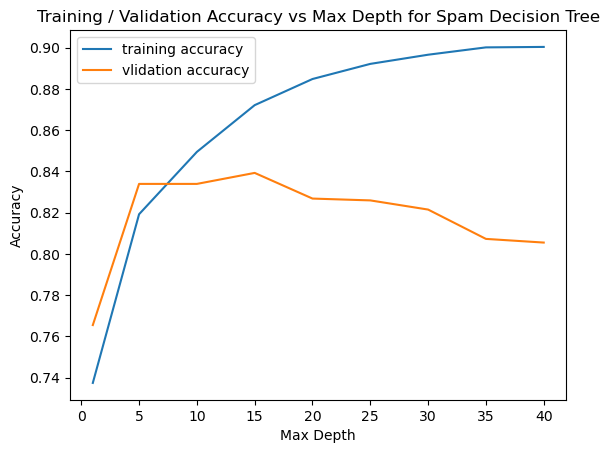

In [608]:
import matplotlib.pyplot as plt

depth = [1, 5, 10, 15, 20, 25, 30, 35, 40]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Or my own method?
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

train_accuracy = []
test_accuracy = []
for d in depth:
    Spam_decision_tree = DecisionTree(max_depth = d, feature_labels = features, m = 32)
    Spam_decision_tree.fit(X_train, y_train)

    prediction = []
    for i in range(len(X_train)):
        predict = Spam_decision_tree.predict(X_train[i])
        prediction.append(predict)

    train_accuracy.append(accuracy_score(y_train, prediction, len(y_train)))

    prediction = []
    for i in range(len(X_test)):
        predict = Spam_decision_tree.predict(X_test[i])
        prediction.append(predict)
        
    test_accuracy.append(accuracy_score(y_test, prediction, len(y_test)))

plt.plot(depth, train_accuracy, label = "training accuracy")
plt.plot(depth, test_accuracy, label = "vlidation accuracy")
plt.title("Training / Validation Accuracy vs Max Depth for Spam Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()    
plt.show()


<h1>Q4-6 Writeup Requirements for the Titanic Dataset 

In [614]:
Titanic_decision_tree = DecisionTree(max_depth = 3, feature_labels = features, m = 14)
Titanic_decision_tree.fit(X, y)

print(Titanic_decision_tree)

[b'female' < 1.0: [b'pclass' < 2.0: [b'age' < 17.0: 1 (5) | 0 (140)] | [b'age' < 4.0: 1 (15) | 0 (499)]] | [b'pclass' < 3.0: [b'fare' < 31.6833: 1 (74) | 1 (115)] | [b'fare' < 23.45: 1 (138) | 0 (23)]]]
